# Class Inheritance

Inheritance is the process by which one class takes on the attributes and methods of another. Newly formed classes are called child classes, and the classes that child classes are derived from are called parent classes.

It’s important to note that child classes override or extend the functionality (e.g., attributes and behaviors) of parent classes. 

In [10]:
# Parent class
class Dog:

    # Class attribute
    species = 'mammal'

    # Initializer / Instance attributes
    def __init__(self, name, age):
        self.name = name
        self.age = age

    # instance method
    def description(self):
        return ("%s is %d years old" % (self.name, self.age))

    # instance method
    def speak(self, sound):
        return ("%s says %s" % (self.name, sound))
# Child class (inherits from Dog class)
class Bulldog(Dog):
    def run(self, speed):
        return "%s runs %s" % (self.name, speed)
    
class Bulldog2:

    # Class attribute
    species = 'mammal'

    # Initializer / Instance attributes
    def __init__(self, name, age):
        self.name = name
        self.age = age

    # instance method
    def description(self):
        return ("%s is %d years old" % (self.name, self.age))

    # instance method
    def speak(self, sound):
        return ("%s says %s" % (self.name, sound))
    def run(self, speed):
        return "%s runs %s" % (self.name, speed)

In [11]:
jim = Bulldog("Jim", 12)

In [12]:
# Child classes inherit attributes and
# behaviors from the parent class
jim.description()

'Jim is 12 years old'

In [13]:
# Child classes have specific attributes
# and behaviors as well
print(jim.run("slowly"))

Jim runs slowly


In [14]:
dir(jim)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'age',
 'description',
 'name',
 'run',
 'speak',
 'species']

In [9]:
dir(Dog)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'description',
 'speak',
 'species']

#### Practice: write a class named 'alldog' which is inherited from class 'Bulldog'. Write a function in 'alldog' class to return the gender of a dog

In [20]:
# Child class (inherits from Bulldog class)
class alldog(Bulldog):
    def gender(self,value):
        self.gender=value
        return "%s is %s" % (self.name, self.gender)

In [18]:
#this code should work after you create teh alldog class
bingo=alldog('Bingo',1)
print(bingo.gender('male'))
print(bingo.run('fast'))

Bingo is male
Bingo runs fast


# OOP Example: use python class to process seismograms

In [21]:
import numpy as np
import matplotlib.pyplot as plt

Get a list of files under certain folder

In [30]:
import glob
files=glob.glob("./data/2019-02-08-mww59-mindanao-philippines/*BHZ*")
files[0]

'./data/2019-02-08-mww59-mindanao-philippines/II.ASCN.10.BHZ.M.2019.039.121054.SACA'

In [53]:
#define a class object name seismogram
class seismogram:
#the initial function will read the seismic data and save important information to attributes
    def __init__(self,filename):
        self.filename=filename
        fp=open(self.filename,"r")
        lines=fp.readlines()
        fp.close()     
        temp=lines[0].split()
        self.freq=float(temp[0])
        f=float(temp[0])
        temp=lines[6].split()
        self.lat=float(temp[1])
        self.lon=float(temp[2])
        temp=lines[10].split()
        self.distance=float(temp[3])
        temp=lines[14].split()
        self.year=int(temp[0])
        self.day=int(temp[1])
        self.starttime=int(temp[2])*3600+int(temp[3])*60+int(temp[4])
        temp=lines[22].split()
        self.staname=temp[0]
        data=[]
        t=[]
        j=0
        for line in lines[30:]:
            temp=line.split()
            for i in temp:
                data.append(float(i))
                t.append(j)
                j=j+f
        self.data=np.array(data)
        self.t=np.array(t)
    def max_amp(self):
        self.max_amp=np.abs(self.data).max()
        return self.max_amp
    def plot(self):
        plt.plot(self.t,self.data)

In [54]:
test=seismogram(files[1])

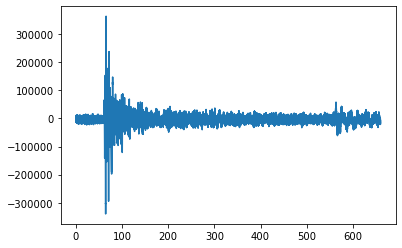

In [55]:
test.plot()

In [44]:



#read all data
sta=[]
for f in files:
    s=seismogram(f)
    sta.append(s)
a=sta[0].lat
a

-7.9327

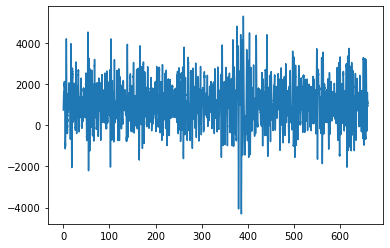

In [45]:
sta[15].plot()

# copy a lot of files to a different directory with different names

In [49]:
# copy files with a different name
import shutil
for s in sta:
    file='./data/eq/%06d.%s.dat' % (s.distance,s.staname)
    shutil.copy(s.filename,file)